In [1]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])

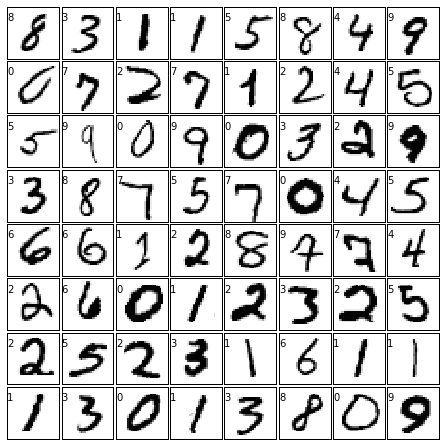

In [4]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [5]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2)
proj_train = pca.fit_transform(X_train)
proj_test = pca.fit_transform(X_test)

<matplotlib.colorbar.Colorbar instance at 0x0000000025B92DC8>

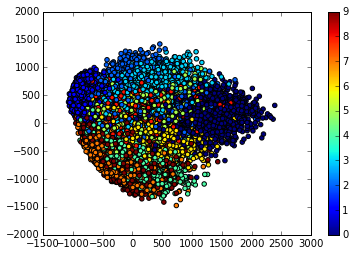

In [6]:
plt.scatter(proj_train[:, 0], proj_train[:, 1], c=y_train)
plt.colorbar()

In [7]:
# test classifier
from sklearn.naive_bayes import GaussianNB

In [8]:
# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

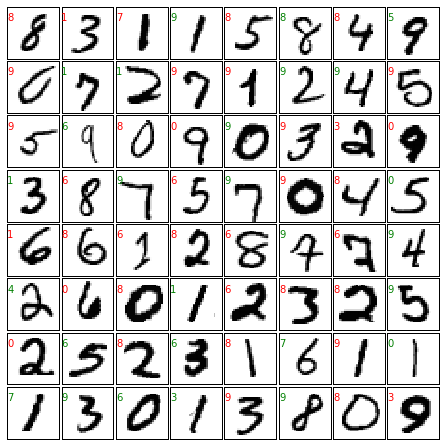

In [9]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [10]:
# accuracy
matches = (predicted == expected)
matches.sum() / float(len(matches))

0.51580952380952383

In [11]:
# f1 score
from sklearn import metrics
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       0.69      0.86      0.77      1068
          1       0.70      0.96      0.81      1166
          2       0.85      0.15      0.26      1031
          3       0.62      0.30      0.40      1060
          4       0.67      0.08      0.15      1012
          5       0.38      0.01      0.02       959
          6       0.55      0.93      0.69      1088
          7       0.91      0.30      0.45      1061
          8       0.27      0.51      0.35      1037
          9       0.37      0.93      0.53      1018

avg / total       0.60      0.52      0.45     10500



In [12]:
# confusion matrix
print metrics.confusion_matrix(expected, predicted)

[[ 920    2    2    4    2    1   90    0   30   17]
 [   2 1116    4    4    2    0   14    0   14   10]
 [ 134   38  157  130   10    4  306    5  224   23]
 [  65   80    2  316    1    1  113    9  367  106]
 [  43   22    2   11   86    4  157    3  180  504]
 [ 120   45    4   21    4   11   95    0  549  110]
 [  10   37    7    3    0    4 1015    0   10    2]
 [   7   13    1    9    8    0    5  315   42  661]
 [  23  221    2    7    6    3   54    0  531  190]
 [   4   18    4    1   10    1    0   15   16  949]]
